## Attrition Rate

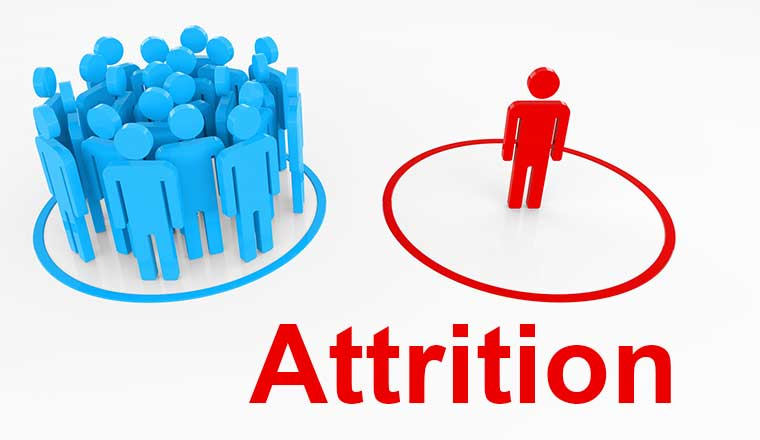

#### Once upon a time, in the heart of a thriving company, the Human Resources department stood as the foundation of its success. HR understood that the key to a flourishing organization lay not only in attracting top talent but also in retaining it. With this in mind, they embarked on a quest to unravel the mysteries of employee attrition and discover the secrets to employee satisfaction and loyalty.

#### We will get through this data, exploring it, and discovering its valuable insights

In [1822]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib import colors
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random

In [1823]:
data = pd.read_csv("Attrition.csv" , sep = "," , encoding = 'utf-8')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1824]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1470
Number of columns: 35


#### Check for duplicate lines

In [1825]:
has_duplicates = data.duplicated().any()
print("Data has duplicate lines:", has_duplicates)

Data has duplicate lines: False


#### Percentage of missing values and descriptive statistics of each column

In [1826]:
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:")
print(missing_percentage)
print("\nDescriptive statistics:")
print(data.describe())

Percentage of missing values:
Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBa

#### Data type of each column

In [1827]:
data_types = data.dtypes
print("\nData types:")
print(data_types)


Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

### Attrition and Individual Factors

In [1828]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

#### 1. How Is Attrition Affected by Gender?

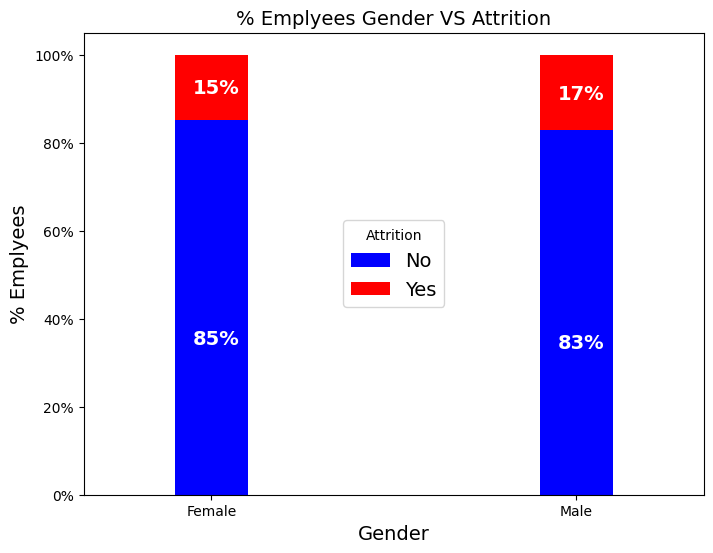

In [1829]:
partner_dependents = data.groupby(['Gender','Attrition']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = ['blue','red'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Attrition',fontsize =14)
ax.set_ylabel('% Emplyees',size = 14)
ax.set_title('% Emplyees Gender VS Attrition',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Males slightly tend to have more attrition rate than females.

#### 

#### 5. What is the effect of age on attrition?

In [1830]:
bar_chart = px.histogram(data, x='Age', color='Attrition', barmode='group',
                         title='Attrition Distribution by Age',
                         labels={'Age': 'Age', 'Attrition': 'Attrition'})

# Display the chart
bar_chart.show()

#### Embloyees in 30th tend to have more attrition rates.

#### 8. What role does gender and age play in this workplace?

In [1831]:
def randRGB():
    rgbValue=""
    for i in range(6):
        rgbValue += random.choice("0123456789ABCDEF")

    rgbValue = "#"+rgbValue
    return rgbValue
## This function returns a random color value

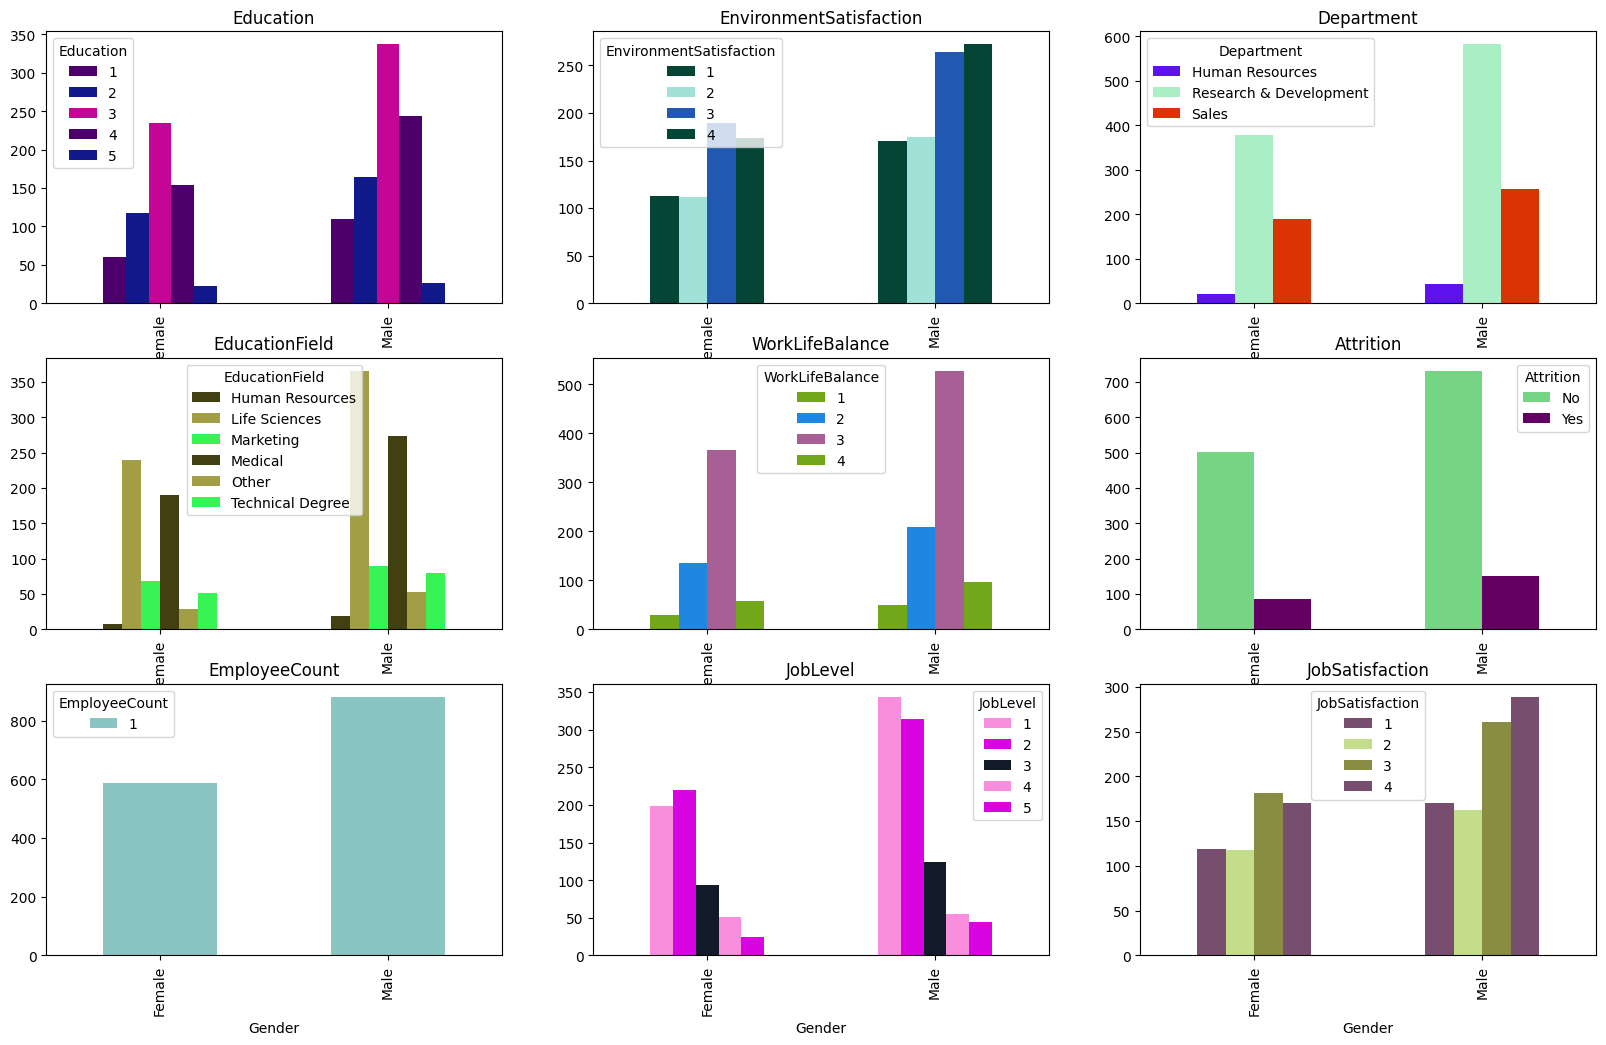

In [1832]:
services = ['Education','EducationField','EmployeeCount','EnvironmentSatisfaction',
           'WorkLifeBalance','JobLevel','Department','Attrition','JobSatisfaction']

# rand_colors=random.shuffle(COLORS)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
for i, item in enumerate(services):
    if i < 3:
        ax = pd.crosstab(data['Gender'], data[item]).plot(kind = 'bar',ax=axes[i,0],color = [randRGB(),randRGB(),randRGB()])
        
    elif i >=3 and i < 6:
        ax = pd.crosstab(data['Gender'], data[item]).plot(kind = 'bar',ax=axes[i-3,1],color =[randRGB(),randRGB(),randRGB()])
        
    elif i < 9:
        ax = pd.crosstab(data['Gender'], data[item]).plot(kind = 'bar',ax=axes[i-6,2],color =[randRGB(),randRGB(),randRGB()])
    ax.set_title(item)
    totals = []


#### 3. What is the effect of the distance from home on attrition?

array([<Axes: title={'center': 'No'}, xlabel='DistanceFromHome'>,
       <Axes: title={'center': 'Yes'}, xlabel='DistanceFromHome'>],
      dtype=object)

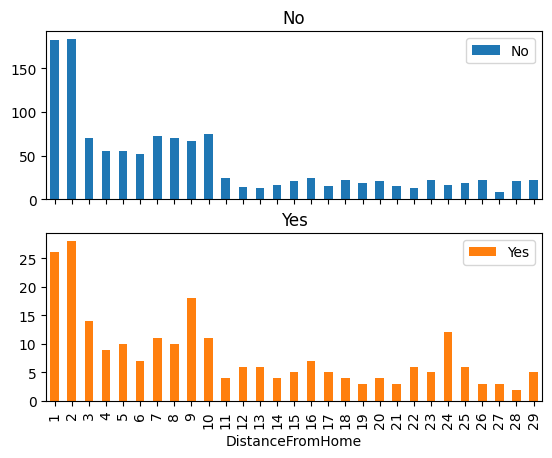

In [1833]:
pd.crosstab(data['DistanceFromHome'], data['Attrition'], dropna=False).plot(kind='bar',subplots=True)

#### The distribution is almost the same, there is a weak relationship between them.

#### 26.Which business unit faces the attrition problem?

#### 4. What is the most Department of attritions?

In [1834]:
attrition_counts = data.groupby('Department')['Attrition'].value_counts().unstack().fillna(0)
attrition_counts

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [1835]:

attrition_proportion = round((attrition_counts['Yes'] / (attrition_counts['Yes'] + attrition_counts['No'])*100),2)

# Create the funnel chart
funnel_chart = go.Figure(go.Funnel(
    y=attrition_proportion.index,
    x=attrition_proportion.values,
    marker=dict(color='gold',),
    opacity=0.65,
    orientation='h'
))


funnel_chart.update_layout(
    title='Attrition by Business Unit',
    xaxis_title='Attrition Proportion',
    yaxis_title='Business Unit',
    funnelmode='stack',
    hovermode='closest',
    plot_bgcolor='black', paper_bgcolor='black',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
    font=dict(color='orange',size=15)
)

funnel_chart.show()

#### All of the 3 depatments are facing the attrition problem, but the sales department has slightly higher attrition rates.

#### 15.Does the Department of work impact attrition?

In [1836]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [1837]:
data=data.replace({"Department":     {"Sales":0 , "Research & Development":1,"Human Resources":2},"Attrition":     {"No": 0, "Yes": 1}})

In [1838]:
corrs = data[['Department','Attrition']].corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation between Monthly Income and Gender',  
                        title_font=dict(size=25, color='orange', family="Muli, sans-serif"),
                        font=dict(color='red',size=15))


#### No, there is very weak correlation.

In [1839]:
data=data.replace({"Department":     {0:"Sales" , 1:"Research & Development",2:"Human Resources"},"Attrition":     {0:"No" , 1:"Yes"}})

#### 6. What is the most job role of attritions?

In [1840]:
attrition_df = data[data['Attrition'] == 'Yes']

# Calculate the count of each job role
job_role_counts = attrition_df['JobRole'].value_counts()


In [1841]:

most_common_job_role = job_role_counts.idxmax()


fig = px.pie(job_role_counts, values=job_role_counts.values, names=job_role_counts.index, hole=0.3)


fig.update_traces(textinfo='percent+label', pull=[0.1 if x == most_common_job_role else 0 for x in job_role_counts.index])


fig.update_layout(title_text='Attritions by Job Role')

fig.show()


print("Most common job role of attritions:", most_common_job_role)

Most common job role of attritions: Laboratory Technician


#### 29. Are more educated people more likely to leave?

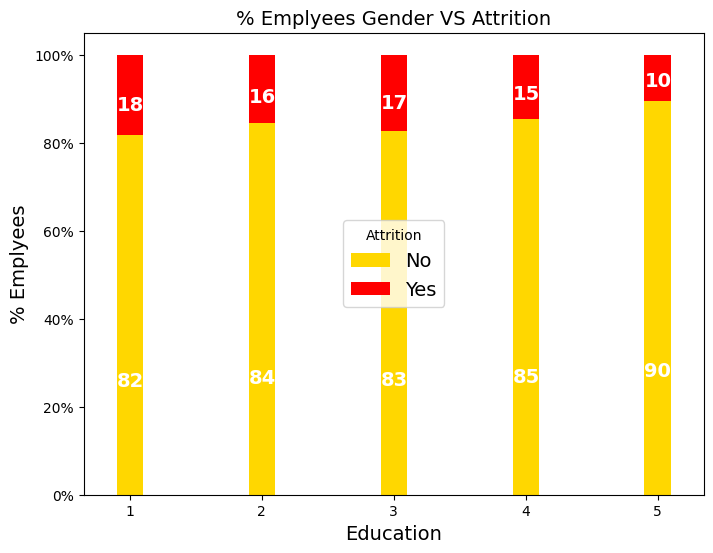

In [1842]:
partner_dependents = data.groupby(['Education','Attrition']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = ['gold','red'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Attrition',fontsize =14)
ax.set_ylabel('% Emplyees',size = 14)
ax.set_title('% Emplyees Gender VS Attrition',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.001*width, p.get_y()+.3*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### No, the less have more attrition rates.

#### 17.How does self Job Satisfaction impact the Attrition?

In [1843]:
bar_chart = px.histogram(data, x='JobSatisfaction', color='Attrition', barmode='group',
                         title='Attrition Distribution by JobSatisfaction',
                         labels={'Age': 'Age', 'Attrition': 'Attrition'})

# Display the chart
bar_chart.show()

#### Embloyees with 1 degree job satisfaction have more attrition rates.

In [1844]:
data['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

#### 19. How does Work Life Balance impact the overall attrition rates?

In [1845]:
attrition_df = data[data['Attrition'].isin( ['Yes'])]
work_life_counts = attrition_df['WorkLifeBalance'].value_counts()
work_life_counts

WorkLifeBalance
3    127
2     58
4     27
1     25
Name: count, dtype: int64

In [1846]:

most_common_job_role = job_role_counts.idxmax()


fig = px.pie(work_life_counts, values=work_life_counts.values, names=work_life_counts.index, hole=0.3)


fig.update_traces(textinfo='percent+label')


fig.update_layout(title_text='Attritions by work life balance')

fig.show()



#### Embloyees with 3 degree Work Life Balance have more attrition rates.

#### 17. How does self Job Satisfaction impact the Attrition?

In [1847]:
attrition_counts = data.groupby('JobLevel')['Attrition'].value_counts().unstack().fillna(0)
attrition_counts

Attrition,No,Yes
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


In [1848]:
attrition_proportion = round((attrition_counts['Yes'] / (attrition_counts['Yes'] + attrition_counts['No'])*100),2)
funnel_chart = go.Figure(go.Funnel(
    y=attrition_proportion.index,
    x=attrition_proportion.values,
    marker=dict(color='orange',),
    opacity=0.65,
    orientation='h'
))


funnel_chart.update_layout(
    title='Attrition by Job Level',
    xaxis_title='Attrition Proportion',
    yaxis_title=' Job Level',
    funnelmode='stack',
    hovermode='closest',
    plot_bgcolor='white', paper_bgcolor='white',
                        title_font=dict(size=25, color='gold', family="Muli, sans-serif"),
    font=dict(color='green',size=15)
)

funnel_chart.show()

#### Embloyees with 1 degree Job level have more attrition rates.

#### 36.How does satisfaction and work-life balance relate to employee retention?

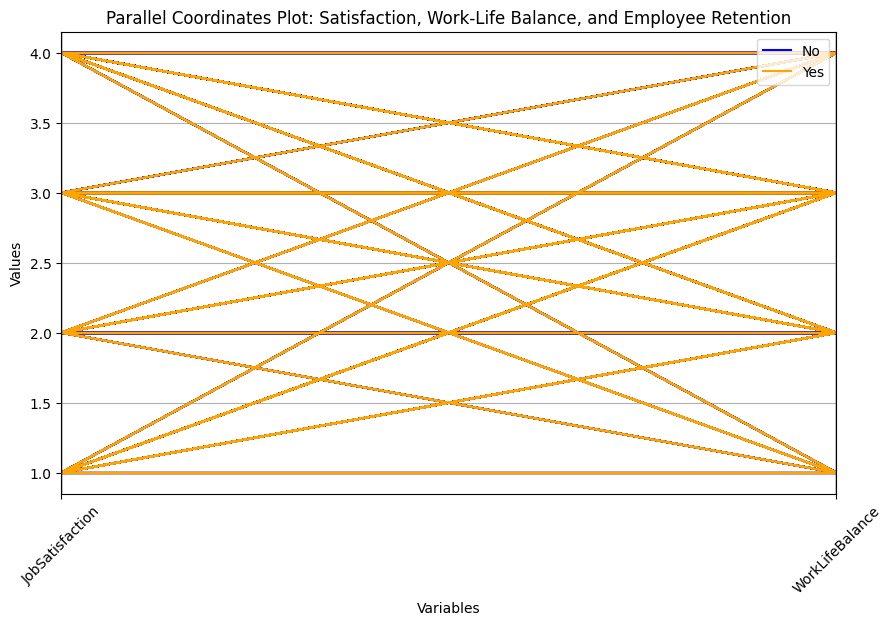

In [1849]:
from pandas.plotting import parallel_coordinates
columns_of_interest = ['JobSatisfaction', 'WorkLifeBalance', 'Attrition']

# Subset the data for retained and non-retained employees
retained_data = data[data['Attrition'] == 'No'][columns_of_interest]
non_retained_data = data[data['Attrition'] == 'Yes'][columns_of_interest]

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(pd.concat([retained_data, non_retained_data]), 'Attrition', color=['blue', 'orange'])
plt.title('Parallel Coordinates Plot: Satisfaction, Work-Life Balance, and Employee Retention')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### It's just for experiment, H don't know what does that mean.

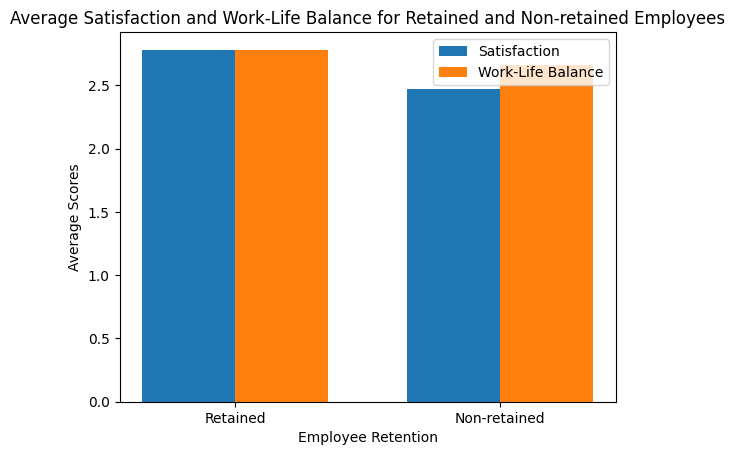

In [1850]:
retained_avg_satisfaction = data[data['Attrition'] == 'No']['JobSatisfaction'].mean()
non_retained_avg_satisfaction = data[data['Attrition'] == 'Yes']['JobSatisfaction'].mean()

retained_avg_worklife = data[data['Attrition'] == 'No']['WorkLifeBalance'].mean()
non_retained_avg_worklife = data[data['Attrition'] == 'Yes']['WorkLifeBalance'].mean()

labels = ['Retained', 'Non-retained']
satisfaction_scores = [retained_avg_satisfaction, non_retained_avg_satisfaction]
worklife_scores = [retained_avg_worklife, non_retained_avg_worklife]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, satisfaction_scores, width, label='Satisfaction')
rects2 = ax.bar([i + width for i in x], worklife_scores, width, label='Work-Life Balance')

ax.set_xlabel('Employee Retention')
ax.set_ylabel('Average Scores')
ax.set_title('Average Satisfaction and Work-Life Balance for Retained and Non-retained Employees')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#### It's kindly related.

#### 21. How does work duration in the current role impact Attrition?

In [1851]:
attrition_data = data[data['Attrition'] == 'Yes']
fig = px.histogram(attrition_data, x='YearsInCurrentRole',
                         title='Work Duration in Current Role for Attrition Cases', height=250,
                         color_discrete_sequence=['blue']
                         )
fig.update_yaxes(showgrid=True),
fig.update_xaxes(categoryorder='total descending')
# fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='gray', paper_bgcolor='gray',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
                        font=dict(color='white'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

#### The less the Years in current role, the more the attrition increases.

#### 10. Is it possible that employees are leaving because of the work environment?

In [1852]:
reasons = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
leaving_counts = data[data['Attrition'] == 'Yes'][reasons].sum()
counts = data.groupby(reasons)['Attrition'].value_counts().unstack().fillna(0).sum()
counts

Attrition
No     1233.0
Yes     237.0
dtype: float64

In [1853]:
x

fig = go.Figure(data=[go.Pie(
    labels=reasons,
    values=leaving_counts,
    hole=0.5,
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c']),
    hoverinfo='label+percent'
)])

fig.update_layout(
    title='Reasons for Leaving Based on Work',
    annotations=[dict(text='Attrition', x=0.5, y=0.5, font_size=20, showarrow=False)],
    font=dict(color='blue',size=15)
)

fig.show()

#### yes, a measurable cut. 

#### we need to know more about the hires

#### 37. How many new hires leave in less than a year and why?

In [1854]:
df=data[(data['YearsAtCompany' ]<1) & (data['Attrition']=='Yes')]
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,...,4,80,0,0,2,2,0,0,0,0
171,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,1,235,...,1,80,0,1,5,4,0,0,0,0
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,3,80,0,5,5,1,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,3,80,0,0,2,3,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4,80,0,0,3,3,0,0,0,0
585,23,Yes,Travel_Rarely,1243,Research & Development,6,3,Life Sciences,1,811,...,3,80,2,1,2,3,0,0,0,0
711,29,Yes,Travel_Rarely,906,Research & Development,10,3,Life Sciences,1,994,...,3,80,0,3,5,3,0,0,0,0
801,50,Yes,Travel_Frequently,959,Sales,1,4,Other,1,1113,...,4,80,0,5,4,3,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0


In [1855]:
df['EmployeeCount'].sum()

16

In [1856]:
df[['EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating']]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating
2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3
127,4,Male,50,3,1,Sales Representative,3,Single,1675,26820,1,Yes,19,3
171,3,Female,100,1,1,Sales Representative,1,Single,2325,20989,0,No,21,4
264,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,No,11,3
296,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,No,13,3
457,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Yes,14,3
585,3,Male,63,4,1,Laboratory Technician,1,Married,1601,3445,1,Yes,21,4
711,4,Female,92,2,1,Research Scientist,1,Single,2404,11479,6,Yes,20,4
801,4,Male,81,3,2,Sales Executive,3,Single,4728,17251,3,Yes,14,3
828,3,Male,80,3,1,Laboratory Technician,3,Single,1904,13556,1,No,12,3


#### They are 16. It is complex to determine exactily why they left, but there is some insights: Monthly income, age, job level, and the current rule.

#### 38.What is the rate of resignations each year versus the rate of new appointments?

Number of Resignations for Each Value in the YearsAtCompany column:
Axes(0.125,0.11;0.775x0.77)


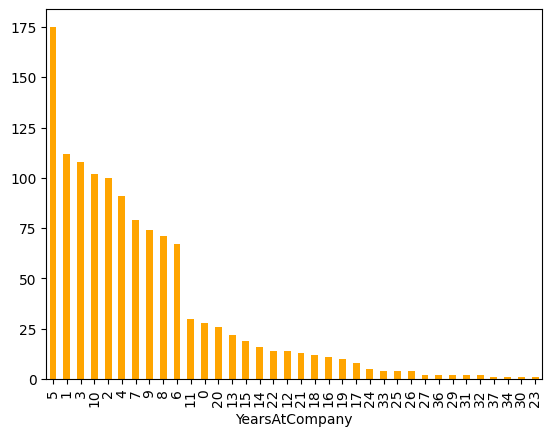

In [1857]:
resignations_per_year = data[data['Attrition'] == "No"]['YearsAtCompany'].value_counts().plot(kind='bar',color='orange')


print("Number of Resignations for Each Value in the YearsAtCompany column:")
print(resignations_per_year)

#### This is rate of new appointments, The rate of new appointments increased exponentially in the last 10 years.

In [1858]:
fig = px.histogram(data, x=data[data['Attrition'] == "Yes"]['YearsAtCompany'],
                         title='EducationField vs Attrition', height=250,
                         color_discrete_sequence=['gold']
                         )
fig.update_yaxes(showgrid=True),
fig.update_xaxes(categoryorder='total descending')
# fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        title_font=dict(size=25, color='orange', family="Muli, sans-serif"),
                        font=dict(color='orange'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

#### This is rate of resignations, The rate of resignations is proportionaly increased in the last 10 years.

#### 2. How Is Attrition Affected by business travels?

In [1859]:
data=data.replace({"Attrition":     {"No": 0, "Yes": 1}})

In [1860]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [1861]:
attrition_counts = data.groupby('BusinessTravel')['Attrition'].sum()
attrition_counts 

BusinessTravel
Non-Travel            12
Travel_Frequently     69
Travel_Rarely        156
Name: Attrition, dtype: int64

In [1862]:
labels = attrition_counts.index
counts = attrition_counts.values

fig = go.Figure(data=[go.Pie(labels=labels, values=counts, hole=0.6)])

# Set layout options
fig.update_layout(
    title='Attrition by Business Travel',
    showlegend=True,
    annotations=[dict(text='Attrition', x=0.5, y=0.5, font_size=20, showarrow=False)],font=dict(color='blue',size=15)
)

#### Travel_Rarely has the highet Attrition rates

#### 22.Does hike percentage impact Attrition?

In [1863]:
bar_chart = px.histogram(data, x='PercentSalaryHike', color='Attrition', barmode='group',
                         title='Attrition Distribution by PercentSalaryHike',
                         labels={'PercentSalaryHike': 'PercentSalaryHike', 'Attrition': 'Attrition'})

# Display the chart
bar_chart.show()

#### The relationship is weak.

#### 23. Are managers a reason for people resigning?

In [1864]:
data['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

In [1865]:
attrition_counts = data.groupby('YearsWithCurrManager')['Attrition'].value_counts().unstack().fillna(0)
attrition_counts

Attrition,0,1
YearsWithCurrManager,,
0,178.0,85.0
1,65.0,11.0
2,294.0,50.0
3,123.0,19.0
4,87.0,11.0
5,27.0,4.0
6,25.0,4.0
7,185.0,31.0
8,97.0,10.0


In [1866]:
attrition_proportion = round((attrition_counts[1] / (attrition_counts[1] + attrition_counts[0])*100),2)
funnel_chart = go.Figure(go.Funnel(
    y=attrition_proportion.index,
    x=attrition_proportion.values,
    marker=dict(color='blue',),
    opacity=0.65,
    orientation='h'
))


funnel_chart.update_layout(
    title='Attrition by Years With Current Manager',
    xaxis_title='Attrition Proportion',
    yaxis_title=' Years With Current Manager',
    funnelmode='stack',
    hovermode='closest',
    plot_bgcolor='white', paper_bgcolor='white',
                        title_font=dict(size=30, color='gold', family="Muli, sans-serif"),
    font=dict(color='green',size=20)
)

funnel_chart.show()

#### No.

#### 30. Which Education Field is more likely to leave?

In [1867]:
fig = px.histogram(data, x='EducationField',y='Attrition',
                         title='EducationField vs Attrition', height=250,
                         color_discrete_sequence=['gold']
                         )
fig.update_yaxes(showgrid=True),
fig.update_xaxes(categoryorder='total descending')
# fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='black', paper_bgcolor='black',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
                        font=dict(color='white'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

#### Life Sciences has the highest attrition rates.

#### 5. What is the effect of YearsWithCurrManager on attrition?

In [1868]:
bar_chart = px.histogram(data, x='YearsWithCurrManager', color='Attrition', barmode='group',
                         title='Attrition Distribution by Years with current manager',
                         labels={'Age': 'Age', 'Attrition': 'Attrition'})


# Display the chart
bar_chart.show()

#### The less the years with the current manager, the more the attrition increases.

In [1869]:
data=data.replace({"OverTime":     {"No":0 , "Yes":1},"EducationField":     {"Life Sciences":0 , "Medical":1,"Marketing":2,"Technical Degree":3,"Human Resources":4,"Other":5},
                   "Department":     {"Sales":0 , "Research & Development":1,"Human Resources":2},
                   "BusinessTravel": {'Travel_Rarely':0 , 'Travel_Frequently':1,"Non-Travel":2},
                   "JobRole":{'Sales Executive':0, 'Research Scientist':1,
       'Healthcare Representative':2, 'Laboratory Technician':3,
       'Manufacturing Director':4, 'Sales Representative':5,
       'Human Resources':6, 'Research Director':7, 'Manager':8},
              "MaritalStatus":  {'Single':0, 'Married':1, 'Divorced':2},
              "Over18": {'Y':1, 'N':0}})


In [1870]:
data.select_dtypes(include=["object"])



,Gender
0,Female
1,Male
2,Male
3,Female
4,Male
...,...
1465,Male
1466,Male
1467,Male
1468,Male


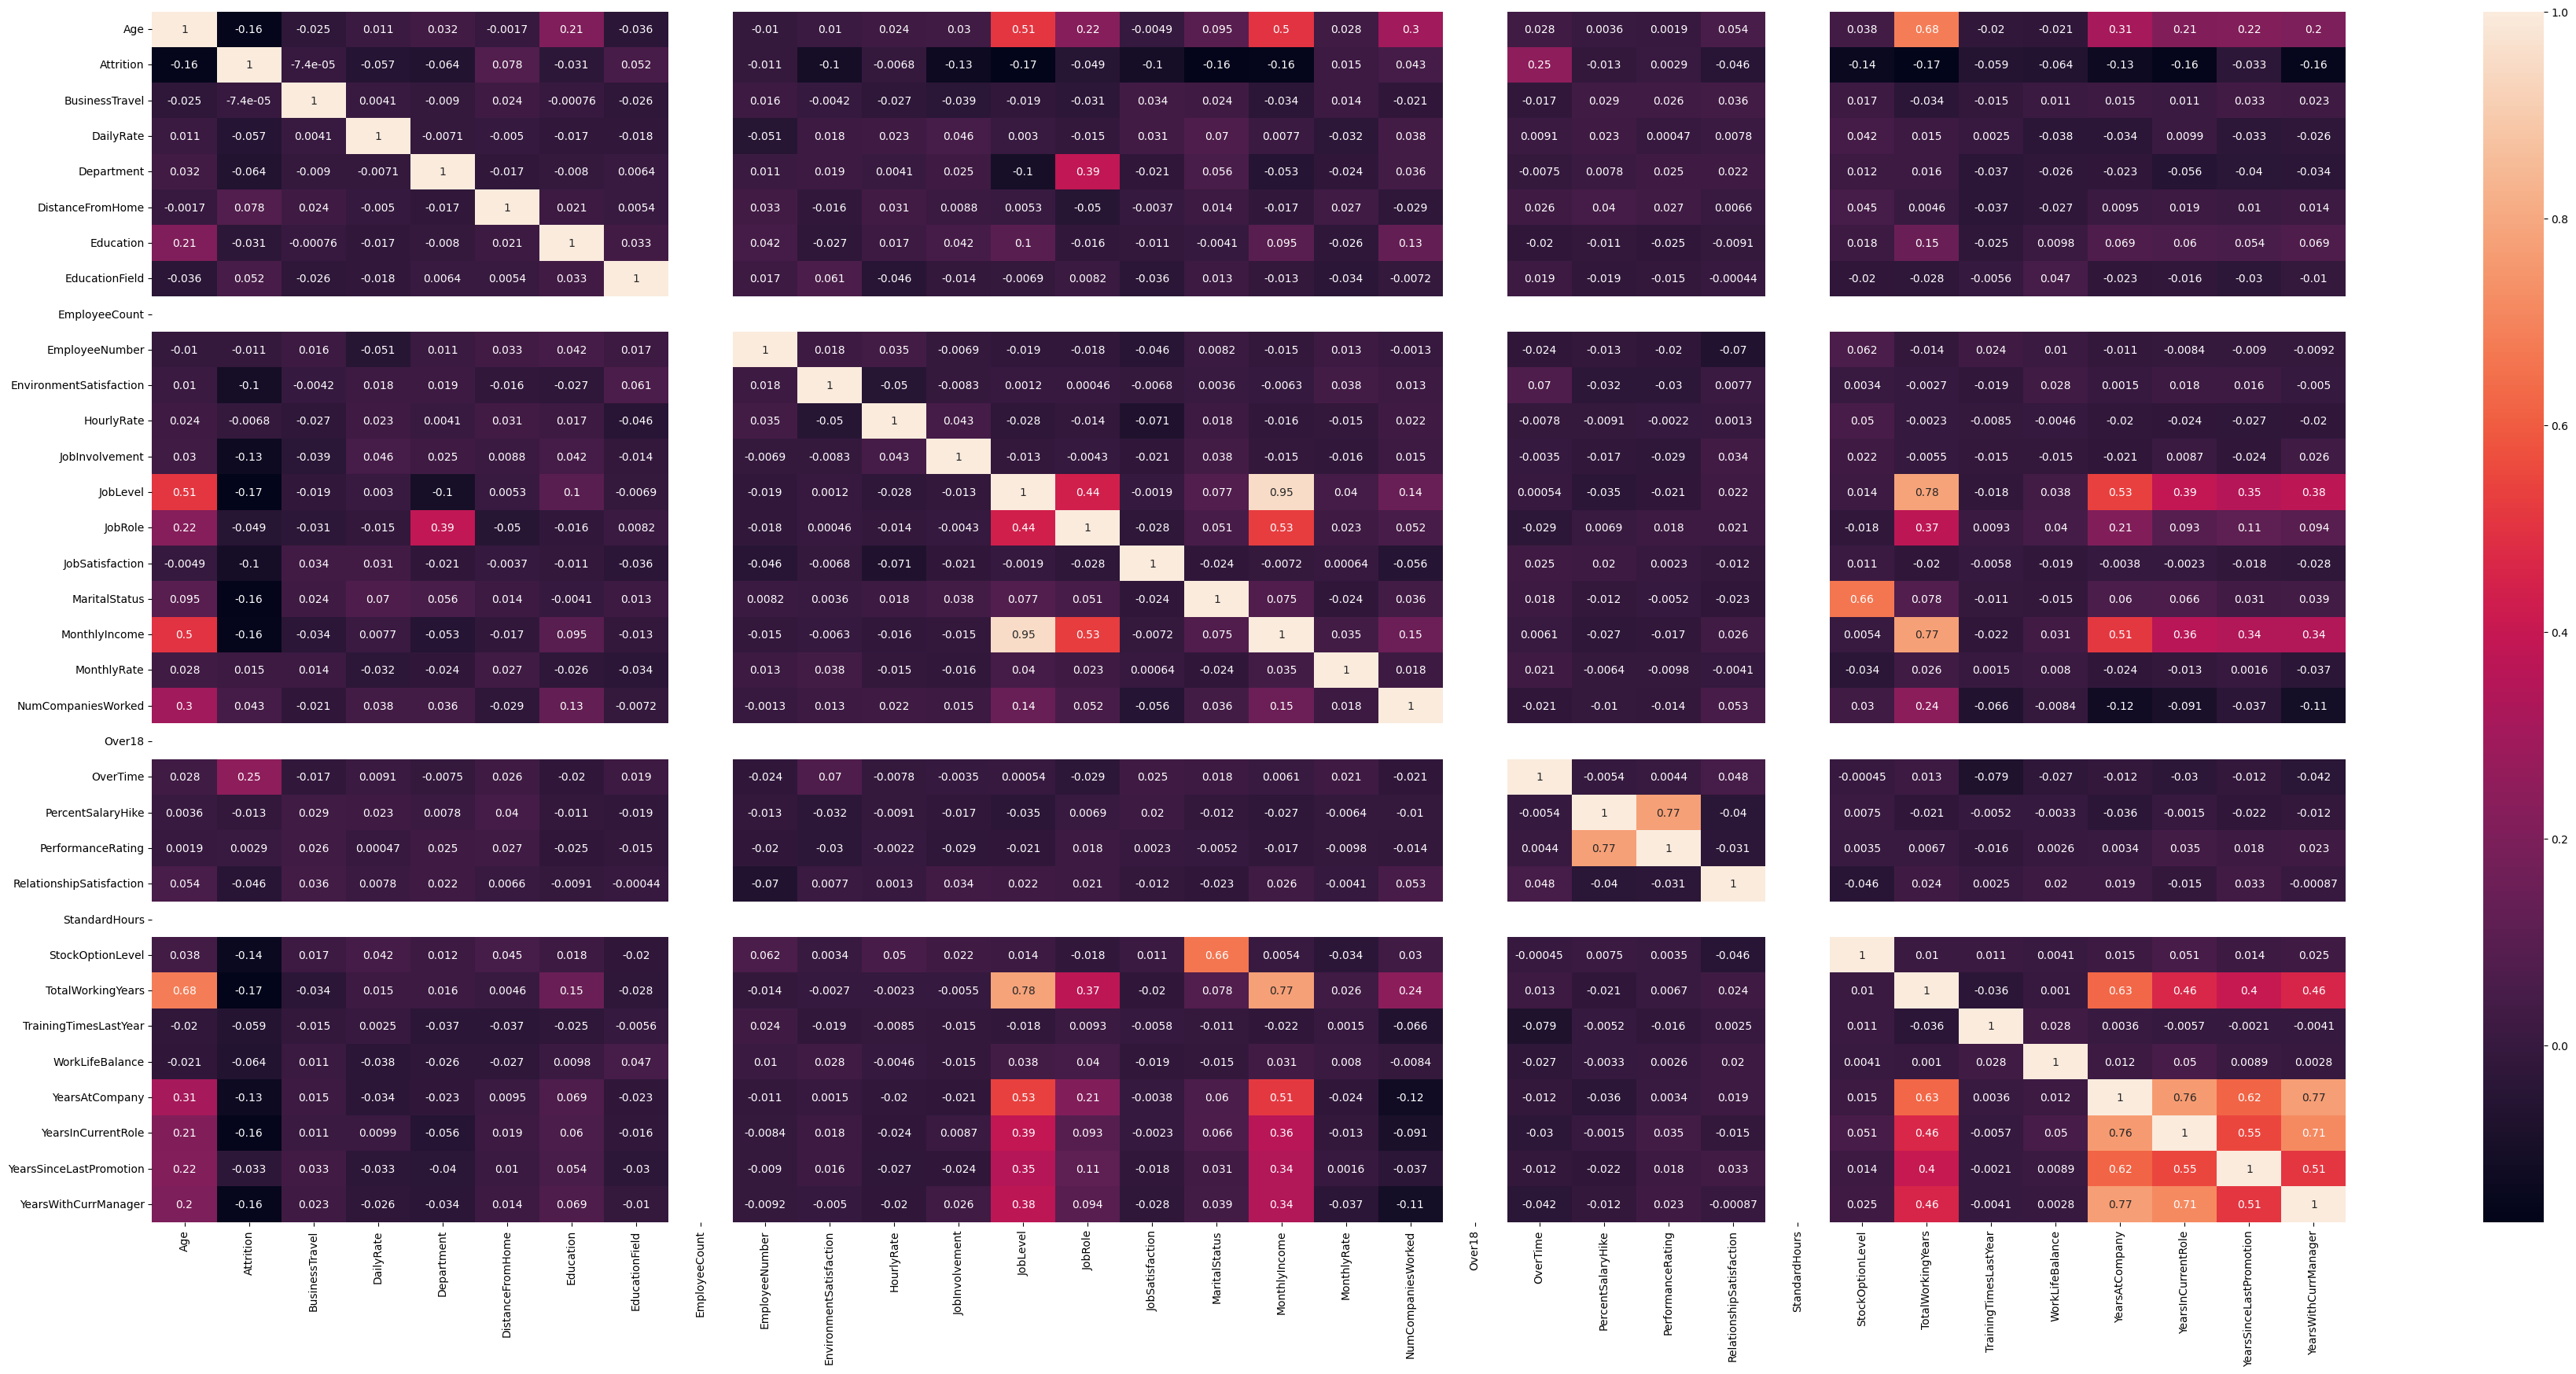

In [1871]:
numerical_columns = data.select_dtypes(include=['number'])
corrs = numerical_columns.corr()
fig, ax = plt.subplots(figsize=(45, 20)) 

hm = sns.heatmap(data=corrs,
                annot=True)
   

plt.show()

#### Based on the Heatmap we can answer some questions related to it.

#### 4. Is salary one of the main reasons?

#### No, it's not.

#### 6. Is income the main factor towards employee attrition?

#### No, it's not.

#### 10. Is it possible that employees are leaving because of the work environment?

#### The correlation between the work environment and attrition rate is negative and weak, which means that there is a significant cut leaving because they are in a bad environment.

#### 16. How does the environment satisfaction impact attrition?

#### it has a weak and an inverse correlation with atttrition.

#### 8. Do Education Field play a role? 
#### we need to know the correlation between education field and attrition rate.

#### It a weak postive correlation between them, which means that its role is less significant.

#### 9. Do overtime stresses employees and makes them have to leave?

#### The correlation between overtime and attrition is 0.25, so yes, it affects the attrition rate.

#### There is a negative weak correlation between them.

#### 18. Does company stocks for employees impact attrition?

#### yes, slightly

#### 11.What factors are contributing more to employee attrition?

#### Over time mainly,then job level, and total working years

#### We still need to know the factors affecting the performance

#### 35.What factors contribute to retaining high performing employees?

#### The main factor is the PercentSalaryHike

#### 9. How much does income matter?

In [1872]:
corrs = data[['MonthlyIncome','Attrition']].corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation between Monthly Income and Gender',  
                        title_font=dict(size=25, color='orange', family="Muli, sans-serif"),
                        font=dict(color='red',size=15))

#### There is a weak correlation between them

### Attrition Analysis and Company Measures

#### 31.Does the source of the employee matter? Which website produces the best employees?

#### It is possible that the source of the employee can matter. ZIPRecruiter and LinkedIn 

#### 32.Is JobLevel equivalent to performance? Can we create a feature to measure this?

#### JobLevel is not necessarily equivalent to performance. There are many factors that can contribute to performance, such as education, experience, and skills. However, JobLevel can be a good proxy for performance, as it is likely that employees with higher JobLevels are more experienced and have more skills.

In [1875]:
average_performance = data.groupby('JobLevel')['PerformanceRating'].mean().reset_index()

data = pd.merge(data, average_performance, on='JobLevel', suffixes=('', '_AvgPerformance'))

print(data[['JobLevel', 'PerformanceRating', 'PerformanceRating_AvgPerformance']])

      JobLevel  PerformanceRating  PerformanceRating_AvgPerformance
0            2                  3                          3.149813
1            2                  4                          3.149813
2            2                  3                          3.149813
3            2                  3                          3.149813
4            2                  3                          3.149813
...        ...                ...                               ...
1465         5                  3                          3.101449
1466         5                  3                          3.101449
1467         5                  3                          3.101449
1468         5                  3                          3.101449
1469         5                  3                          3.101449

[1470 rows x 3 columns]


#### 33.People who live more than 25 minutes away from work tend to be less happy than those who don't. Lets see whether this is the case.

In [1878]:
import scipy.stats as stats
long_commute_data = data[data['DistanceFromHome'] > 25]


correlation, p_value = stats.pearsonr(long_commute_data['DistanceFromHome'], long_commute_data['JobSatisfaction'])

print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.01978558933333082
p-value: 0.8556641630079097


#### there appears to be a very weak positive correlation between distance from work and job satisfaction for people with commutes longer than 25 minutes. However, the correlation is not statistically significant, indicated by the high p-value.This suggests that there is no strong evidence to support the hypothesis that people who live more than 25 minutes away from work are less happy

#### 34.What sources are best for high performing employees?

In [1879]:
source_performance = data.groupby('Education')['PerformanceRating'].mean().sort_values(ascending=False)

print("Top Education for high-performing employees:")
print(source_performance.head())

Top Education for high-performing employees:
Education
5    3.187500
1    3.176471
2    3.170213
3    3.143357
4    3.143216
Name: PerformanceRating, dtype: float64


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_20232\3642891859.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Performance by Education')

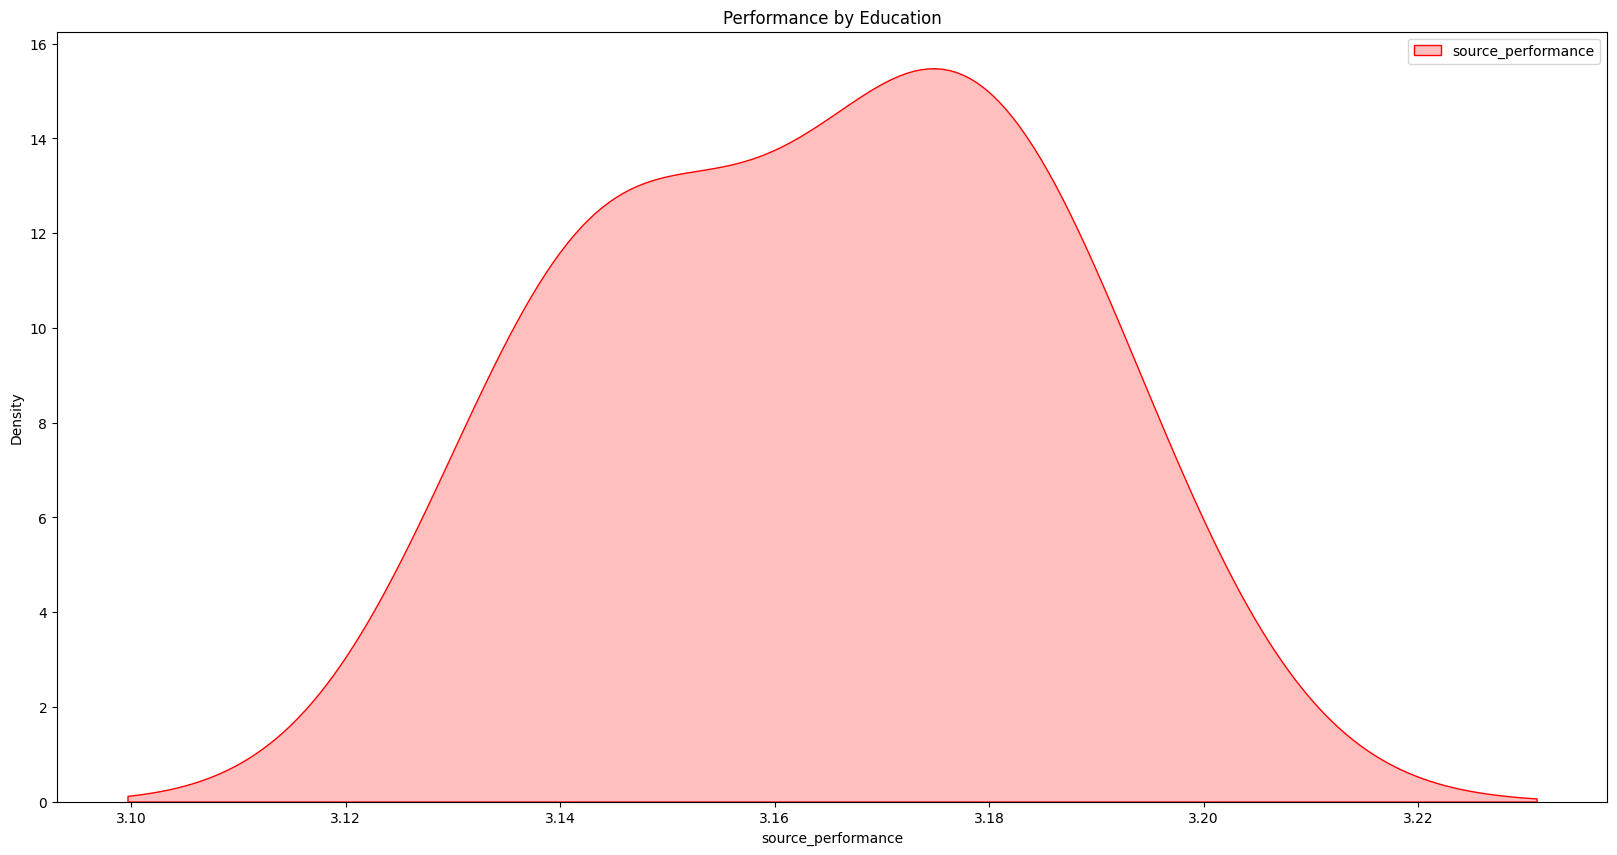

In [1880]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.kdeplot(source_performance,
                color="red", shade = True)

# ax.set_xlim(0, 50)
# ax.legend(["F Arythmia "],loc='upper right')KURTOSIS

ax.legend(["source_performance"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('source_performance')
ax.set_title('Performance by Education')

In [1881]:
source_performance = data.groupby('TrainingTimesLastYear')['PerformanceRating'].mean().sort_values(ascending=False)

print("Top TrainingTimesLastYear for high-performing employees:")
print(source_performance.head())

Top TrainingTimesLastYear for high-performing employees:
TrainingTimesLastYear
0    3.185185
2    3.162706
5    3.159664
3    3.150713
6    3.138462
Name: PerformanceRating, dtype: float64


In [1882]:
source_performance = data.groupby('Education')['TrainingTimesLastYear'].mean().sort_values(ascending=False)

print("Top TrainingTimesLastYear for Education:")
print(source_performance.head())

Top TrainingTimesLastYear for Education:
Education
5    3.000000
1    2.864706
2    2.847518
3    2.795455
4    2.718593
Name: TrainingTimesLastYear, dtype: float64


#### 24.What business value does the model bring?

#### The model brings significant business value by providing valuable insights and analysis based on the data it processes. It can assist in making informed decisions, identifying patterns and trends, and optimizing various aspects of the business. By leveraging the model's capabilities, organizations can gain a deeper understanding of their operations, customers, and employees, leading to improved strategies, enhanced efficiency, and better outcomes.

#### 25. Will the model save lots of money?

#### While the model can contribute to cost savings through its ability to analyze data and provide valuable insights, the extent of the savings will depend on the specific use case and how the organization utilizes the information generated. The model itself is a tool that assists in decision-making and optimization, but the actual cost savings will be influenced by the actions and strategies implemented based on the insights provided by the model. It's important to note that achieving significant cost savings requires a holistic approach, combining the model's outputs with effective implementation and execution within the organization.